# Графы. Алгоритм Дейкстры

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from collections import namedtuple
import math

## 1. Реализация

### Через векторы смежности и матрицу весов

In [2]:
def get_shortest_path_Dijsktra(vectors, weights, node_s, node_d):
    processed = set()
    shortest_distances = {i: math.inf for i in range(len(vectors))}
    previous_nodes = {i: None for i in range(len(vectors))}
    shortest_distances[node_s] = 0
    while len(processed) < len(vectors):
        current_node = sorted([(dist, node) for node, dist in shortest_distances.items() if node not in processed])[0][1]
        if current_node == node_d:
            break
        processed.add(current_node)
        for node_adj, weight in zip(vectors[current_node], weights[current_node]):
            if node_adj in processed:
                continue
            distance_to_adjacent_node = shortest_distances[current_node] + weight
            if distance_to_adjacent_node < shortest_distances[node_adj]:
                shortest_distances[node_adj] = distance_to_adjacent_node
                previous_nodes[node_adj] = current_node
    shortest_path = [node_d]
    previous_node = previous_nodes[node_d]
    while previous_node is not None:
        shortest_path.append(previous_node)
        previous_node = previous_nodes[previous_node]
    return list(reversed(shortest_path))

### C пояснениями на примере графа из лекции

In [3]:
Edge = namedtuple('Edge', ['node_d', 'weight'])

graph = {
    'A': [Edge('B', 2), Edge('C', 3), Edge('D', 6)],
    'B': [Edge('A', 2), Edge('C', 4), Edge('E', 9)],
    'C': [Edge('A', 3), Edge('B', 4), Edge('D', 1), Edge('E', 7), Edge('F', 6)],
    'D': [Edge('A', 6), Edge('C', 1), Edge('F', 4)],
    'E': [Edge('B', 9), Edge('C', 7), Edge('F', 1), Edge('G', 5)],
    'F': [Edge('C', 6), Edge('D', 4), Edge('E', 1), Edge('G', 8)],
    'G': [Edge('E', 5), Edge('F', 8)],
}

In [4]:
# множество обработанных элементов
processed = set()
# для каждой вершины будем сохранять длину кратчайшего пути до нее
# установим все длины равными бесконечности
shortest_distances = {node: math.inf for node in graph}
previous_nodes = {node: None for node in graph}

# выбираем начальную вершину графа
initial_node = 'A'
# определяем вершины, до которых необходимо проложить кратчайший путь
final_nodes = ['G']
# устанавливаем длину пройденного пути до выбранной вершины равным нулю
shortest_distances[initial_node] = 0

# пока обработаны не все вершины графа
while len(processed) < len(graph):
    # выберем еще не обработанную вершину графа с минимальной длиной пути до нее
    current_node = sorted([(dist, node) for node, dist in shortest_distances.items() if node not in processed])[0][1]
    # пометим текущую вершину как обработанную
    processed.add(current_node)
    print('Current node:', current_node)
    # переберем ребра инцидентные текущей вершине
    for edge in graph[current_node]:
        # если смежная вершина уже была обработана, переходим к следующему ребру
        if edge.node_d in processed:
            continue
        print('Adjacent_node:', edge.node_d)
        # иначе вычислим длину пути от текущей вершины до выбранной смежной,
        # складывая длину пути до текущей вершины с весом соответствующего ребра
        distance_to_adjacent_node = shortest_distances[current_node] + edge.weight
        #print('shortest_distances[current_node]', shortest_distances[current_node])
        #print(distance_to_adjacent_node)
        # если вычисленная длина меньше текущей длины пути до смежной вершины,
        # мы нашли более короткий путь поэтому
        if distance_to_adjacent_node < shortest_distances[edge.node_d]:
            # сохраним вычисленную длину пути до выбранной смежной вершины
            shortest_distances[edge.node_d] = distance_to_adjacent_node
            # сохраним текущую вершину для выбранной смежной, как вершину,
            # по которой можно добраться до смежной крайтчайшим путем
            previous_nodes[edge.node_d] = current_node
    print('shortest_distances', shortest_distances)
    print('previous_nodes', previous_nodes)
    print()

Current node: A
Adjacent_node: B
Adjacent_node: C
Adjacent_node: D
shortest_distances {'A': 0, 'B': 2, 'C': 3, 'D': 6, 'E': inf, 'F': inf, 'G': inf}
previous_nodes {'A': None, 'B': 'A', 'C': 'A', 'D': 'A', 'E': None, 'F': None, 'G': None}

Current node: B
Adjacent_node: C
Adjacent_node: E
shortest_distances {'A': 0, 'B': 2, 'C': 3, 'D': 6, 'E': 11, 'F': inf, 'G': inf}
previous_nodes {'A': None, 'B': 'A', 'C': 'A', 'D': 'A', 'E': 'B', 'F': None, 'G': None}

Current node: C
Adjacent_node: D
Adjacent_node: E
Adjacent_node: F
shortest_distances {'A': 0, 'B': 2, 'C': 3, 'D': 4, 'E': 10, 'F': 9, 'G': inf}
previous_nodes {'A': None, 'B': 'A', 'C': 'A', 'D': 'C', 'E': 'C', 'F': 'C', 'G': None}

Current node: D
Adjacent_node: F
shortest_distances {'A': 0, 'B': 2, 'C': 3, 'D': 4, 'E': 10, 'F': 8, 'G': inf}
previous_nodes {'A': None, 'B': 'A', 'C': 'A', 'D': 'C', 'E': 'C', 'F': 'D', 'G': None}

Current node: F
Adjacent_node: E
Adjacent_node: G
shortest_distances {'A': 0, 'B': 2, 'C': 3, 'D': 4, '

In [5]:
for final_node in final_nodes:
    shortest_path = []
    shortest_path.append(final_node)
    previous_node = previous_nodes[final_node]
    while previous_node is not None:
        shortest_path.append(previous_node)
        previous_node = previous_nodes[previous_node]
    print(f'Shortest path from {initial_node} to {final_node}', list(reversed(shortest_path)))

Shortest path from A to G ['A', 'C', 'D', 'F', 'E', 'G']


## 2. Проверка корректности работы

### На примере графа из лекции

In [6]:
adjacency_vectors = [
    [1, 2, 3],
    [0, 2, 4],
    [0, 1, 3, 4, 5],
    [0, 2, 5],
    [1, 2, 5, 6],
    [2, 3, 4, 6],
    [4, 5],
]

weights = [
    [2, 3, 6],
    [2, 4, 9],
    [3, 4, 1, 7, 6],
    [6, 1, 4],
    [9, 7, 1, 5],
    [6, 4, 1, 8],
    [5, 8],
]

#### Готовая библиотека NetworkX

In [7]:
G = nx.Graph()
for node_src in range(len(adjacency_vectors)):
    for node_dest, weight in zip(adjacency_vectors[node_src], weights[node_src]):
        G.add_edge(node_src, node_dest, weight=weight)

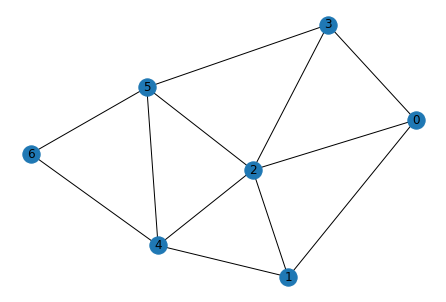

In [8]:
nx.draw(G, with_labels=True)
plt.show()

In [9]:
shortest_path_nx = nx.algorithms.shortest_paths.weighted.dijkstra_path(G, 0, 6)
print(shortest_path_nx)

[0, 2, 3, 5, 4, 6]


#### Векторы смежности

In [10]:
shortest_path_vectors = get_shortest_path_Dijsktra(adjacency_vectors, weights, 0, 6)
print(shortest_path_vectors)
print(shortest_path_vectors == shortest_path_nx)

[0, 2, 3, 5, 4, 6]
True


### На примере случайного графа

In [41]:
def generate_undirected_weighted_graph_adjacency_matrix(N, min_degree, max_degree, max_weight):
    matrix = [[0 for i in range(N)] for i in range(N)]
    for node_s in range(N):
        nodes_d = [x for x in range(N) if x != node_s]
        for j in range(random.randint(min_degree, max_degree)):
            node_d = nodes_d.pop(random.randint(0, len(nodes_d)-1))
            if not matrix[node_s][node_d]:
                weight = random.randint(1, max_weight)
                matrix[node_s][node_d] = weight
                matrix[node_d][node_s] = weight
    return matrix

def transform_adj_matrix_into_adj_vectors(matrix):
    vectors = [[] for i in range(len(matrix))]
    weights = [[] for i in range(len(matrix))]
    for node_s, row in enumerate(adjacency_matrix):
        for node_d, weight in enumerate(row):
            if weight:
                vectors[node_s].append(node_d)
                weights[node_s].append(weight)
    return vectors, weights

In [42]:
N = 20
min_degree = 2
max_degree = 3
max_weight = 9

In [43]:
adjacency_matrix = generate_undirected_weighted_graph_adjacency_matrix(N, min_degree, max_degree, max_weight)
adjacency_vectors, weights = transform_adj_matrix_into_adj_vectors(adjacency_matrix)

#### Готовая библиотека NetworkX

In [44]:
G = nx.Graph()
for node_src in range(len(adjacency_vectors)):
    for node_dest, weight in zip(adjacency_vectors[node_src], weights[node_src]):
        G.add_edge(node_src, node_dest, weight=weight)

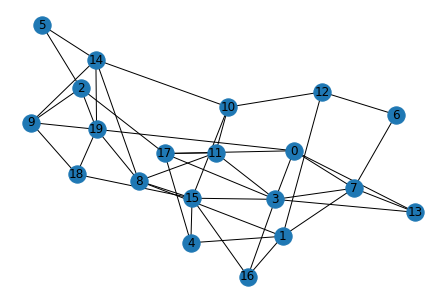

In [45]:
nx.draw(G, with_labels=True)
plt.show()

In [46]:
shortest_path_nx = nx.algorithms.shortest_paths.weighted.dijkstra_path(G, 0, N-1)
print(shortest_path_nx)

[0, 19]


#### Векторы смежности

In [47]:
shortest_path_vectors = get_shortest_path_Dijsktra(adjacency_vectors, weights, 0, N-1)
print(shortest_path_vectors)
print(shortest_path_vectors == shortest_path_nx)

[0, 19]
True


### 3. Сравнение времени выполнения алгоритма

In [95]:
N = 1000
min_degree = 10
max_degree = 30
max_weight = 99

In [96]:
vectors = []
weights = []
for i in range(10):
    adjacency_matrix = generate_undirected_weighted_graph_adjacency_matrix(N, min_degree, max_degree, max_weight)
    v, w = transform_adj_matrix_into_adj_vectors(adjacency_matrix)
    vectors.append(v)
    weights.append(w)

#### Векторы смежности

In [97]:
%%time
for v, w in zip(vectors, weights):
    shortest_path_vectors = get_shortest_path_Dijsktra(v, w, 0, N-1)
    print(shortest_path_vectors)

[0, 394, 433, 842, 129, 999]
[0, 426, 757, 326, 865, 999]
[0, 25, 681, 145, 850, 999]
[0, 747, 836, 37, 582, 562, 43, 478, 899, 999]
[0, 856, 904, 302, 972, 548, 999]
[0, 995, 516, 105, 887, 557, 90, 999]
[0, 19, 656, 484, 96, 288, 224, 999]
[0, 386, 399, 999]
[0, 851, 307, 305, 999]
[0, 669, 777, 131, 779, 999]
CPU times: user 898 ms, sys: 128 µs, total: 898 ms
Wall time: 896 ms


#### Готовая библиотека NetworkX

In [98]:
%%time
for v, w in zip(vectors, weights):
    G = nx.Graph()
    for node_src in range(len(v)):
        for node_dest, weight in zip(v[node_src], w[node_src]):
            G.add_edge(node_src, node_dest, weight=weight)
    shortest_path_nx = nx.algorithms.shortest_paths.weighted.dijkstra_path(G, 0, N-1)
    print(shortest_path_nx)

[0, 394, 433, 842, 129, 999]
[0, 426, 757, 326, 865, 999]
[0, 25, 681, 145, 850, 999]
[0, 747, 836, 37, 582, 562, 43, 478, 899, 999]
[0, 856, 904, 302, 972, 548, 999]
[0, 995, 516, 105, 887, 557, 90, 999]
[0, 19, 656, 484, 96, 288, 224, 999]
[0, 386, 399, 999]
[0, 851, 307, 305, 999]
[0, 669, 777, 131, 779, 999]
CPU times: user 524 ms, sys: 0 ns, total: 524 ms
Wall time: 523 ms
